### FINA 4380 with Marius Popescu

### Asset Pricing Models

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
rets_all = pd.read_csv('month_rets.csv',
                       index_col = 'date',
                       usecols = ['date','TICKER','RET'],
                       parse_dates = True)
rets_all.index.name = 'Date'
rets_all.head()

,TICKER,RET
Date,,
2013-01-31,MSFT,0.027717
2013-02-28,MSFT,0.021129
2013-03-28,MSFT,0.028957
2013-04-30,MSFT,0.157140
2013-05-31,MSFT,0.061329


### The Fama-French Four Factors:
#### 1) Market (Mkt-RF)
#### 2) Size (SMB)
#### 3) Book/Market (HML)
#### 4) Momentum (MOM)

In [4]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2017,12,31)

three_factors = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0]

mom_factor = web.DataReader('F-F_Momentum_Factor','famafrench', start, end)[0]
mom_factor.columns = ['MOM']

four_factors = pd.merge(three_factors, mom_factor, on='Date')

four_factors = four_factors.div(100)

four_factors.index = four_factors.index.to_timestamp(how='end').normalize()

In [5]:
four_factors.tail()

,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,
2017-08-31,0.0016,-0.0167,-0.0209,0.0009,0.0326
2017-09-30,0.0251,0.0446,0.0312,0.0009,-0.0132
2017-10-31,0.0225,-0.0193,0.0021,0.0009,0.0427
2017-11-30,0.0312,-0.0058,-0.0008,0.0008,-0.0087
2017-12-31,0.0106,-0.0132,0.0005,0.0009,-0.0154


### 1. Capital Asset Pricing Model - CAPM

In [6]:
import statsmodels.api as sm

$E[R_i] = R_F + \beta(E[R_M] - R_F)$,

where $E[R_i]$ is the expected return of asset $i$, $R_F$ is the risk-free rate, and $E[R_M]$ is the return of the market.

For estimation purposes, we will use the following time series regression model:

$r_{it} = \alpha_i + \beta_{i} r_{mt} + \epsilon_{it}$

where $r_i$ is the excess return (risk premium) of asset $i$ at time $t$, and $r_m$ is the excess return on the market (market risk premium) at time $t$

#### Running CAPM factor for one stock

In [8]:
amzn = rets_all[rets_all['TICKER']=='AMZN'].copy()

In [9]:
amzn.index.unique()

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-28', '2013-04-30',
               '2013-05-31', '2013-06-28', '2013-07-31', '2013-08-30',
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30', '2014-07-31', '2014-08-29',
               '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31',
               '2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31',
               '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [10]:
four_factors.index.unique()

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [11]:
#Method 1 - Merging amzn with four_factors - Use pd.offsets.MonthEnd(0) to change index values

amzn.index = amzn.index + pd.offsets.MonthEnd(0)

data1 = pd.merge(four_factors, amzn.drop('TICKER',axis=1), on='Date')

data1.head()

,Mkt-RF,SMB,HML,RF,MOM,RET
Date,,,,,,
2013-01-31,0.0557,0.0033,0.0096,0.0,-0.0179,0.058317
2013-02-28,0.0129,-0.0028,0.0011,0.0,0.0129,-0.004633
2013-03-31,0.0403,0.0081,-0.0019,0.0,0.0192,0.008401
2013-04-30,0.0155,-0.0236,0.0045,0.0,0.0022,-0.047581
2013-05-31,0.0280,0.0173,0.0263,0.0,-0.0202,0.060636


In [12]:
#Method 2 - Merging amzn with four_factors - Use pd.merge_asof() method

# Order of the datafames matters, since default direction is 'backward'
data2 = pd.merge_asof(four_factors, amzn.drop('TICKER',axis=1), left_index=True, right_index=True)

#Double check that the following code has the same result, but will keep index values from the left DataFrame
#data2 = pd.merge_asof(amzn, four_factors, left_index=True, right_index=True, direction='forward')

data2.head(15)

,Mkt-RF,SMB,HML,RF,MOM,RET
Date,,,,,,
2013-01-31,0.0557,0.0033,0.0096,0.0,-0.0179,0.058317
2013-02-28,0.0129,-0.0028,0.0011,0.0,0.0129,-0.004633
2013-03-31,0.0403,0.0081,-0.0019,0.0,0.0192,0.008401
2013-04-30,0.0155,-0.0236,0.0045,0.0,0.0022,-0.047581
2013-05-31,0.0280,0.0173,0.0263,0.0,-0.0202,0.060636
2013-06-30,-0.0120,0.0133,0.0003,0.0,0.0052,0.031538
2013-07-31,0.0565,0.0186,0.0057,0.0,0.0176,0.084735
2013-08-31,-0.0271,0.0028,-0.0269,0.0,0.0002,-0.067193
2013-09-30,0.0377,0.0291,-0.0122,0.0,0.0306,0.112677


In [13]:
Y = data1['RET']-data1['RF']
X = sm.add_constant(data1['Mkt-RF'])

reg = sm.OLS(Y,X, missing = 'drop').fit()

print(reg.summary(yname = 'AMZN' + ' Return', xname = ['Alpha', 'MKTRF Beta']))

                            OLS Regression Results                            
Dep. Variable:            AMZN Return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     20.22
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.36e-05
Time:                        16:21:44   Log-Likelihood:                 78.440
No. Observations:                  60   AIC:                            -152.9
Df Residuals:                      58   BIC:                            -148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha          0.0113      0.009      1.201      0.2

In [14]:
# Running CAPM for all stocks, and storing the parameters in results_capm
results_capm = pd.DataFrame()

for ticker in rets_all['TICKER'].unique():
    stock = rets_all[rets_all['TICKER']==ticker].copy()
    stock.index = stock.index + pd.offsets.MonthEnd(0)
    
    data = pd.merge(stock, four_factors, on='Date')

    Y = data['RET']-data['RF']
    X = sm.add_constant(data['Mkt-RF'])
    reg = sm.OLS(Y,X, missing = 'drop').fit()
    
    results_capm = pd.concat([results_capm, 
                            pd.DataFrame({'TICKER':[ticker],
                                          'Alpha':[reg.params[0]],
                                          'Alpha p-value':[reg.pvalues[0]],
                                          'MKTRF Beta':[reg.params[1]],
                                          'MKTRF Beta p-value':[reg.pvalues[1]], 
                                         'Adj R2':[reg.rsquared_adj]})],
                                           axis = 0)
results_capm.set_index('TICKER', inplace = True)

In [15]:
results_capm.round(4)

,Alpha,Alpha p-value,MKTRF Beta,MKTRF Beta p-value,Adj R2
TICKER,,,,,
MSFT,0.0129,0.1105,0.8326,0.0019,0.1396
IBM,-0.0117,0.0618,0.9173,0.0000,0.2560
FB,0.0269,0.0398,0.6808,0.1050,0.0282
AAPL,0.0037,0.6765,1.0725,0.0004,0.1809
AMZN,0.0113,0.2347,1.3662,0.0000,0.2457
GOOGL,0.0097,0.1934,0.7858,0.0016,0.1440


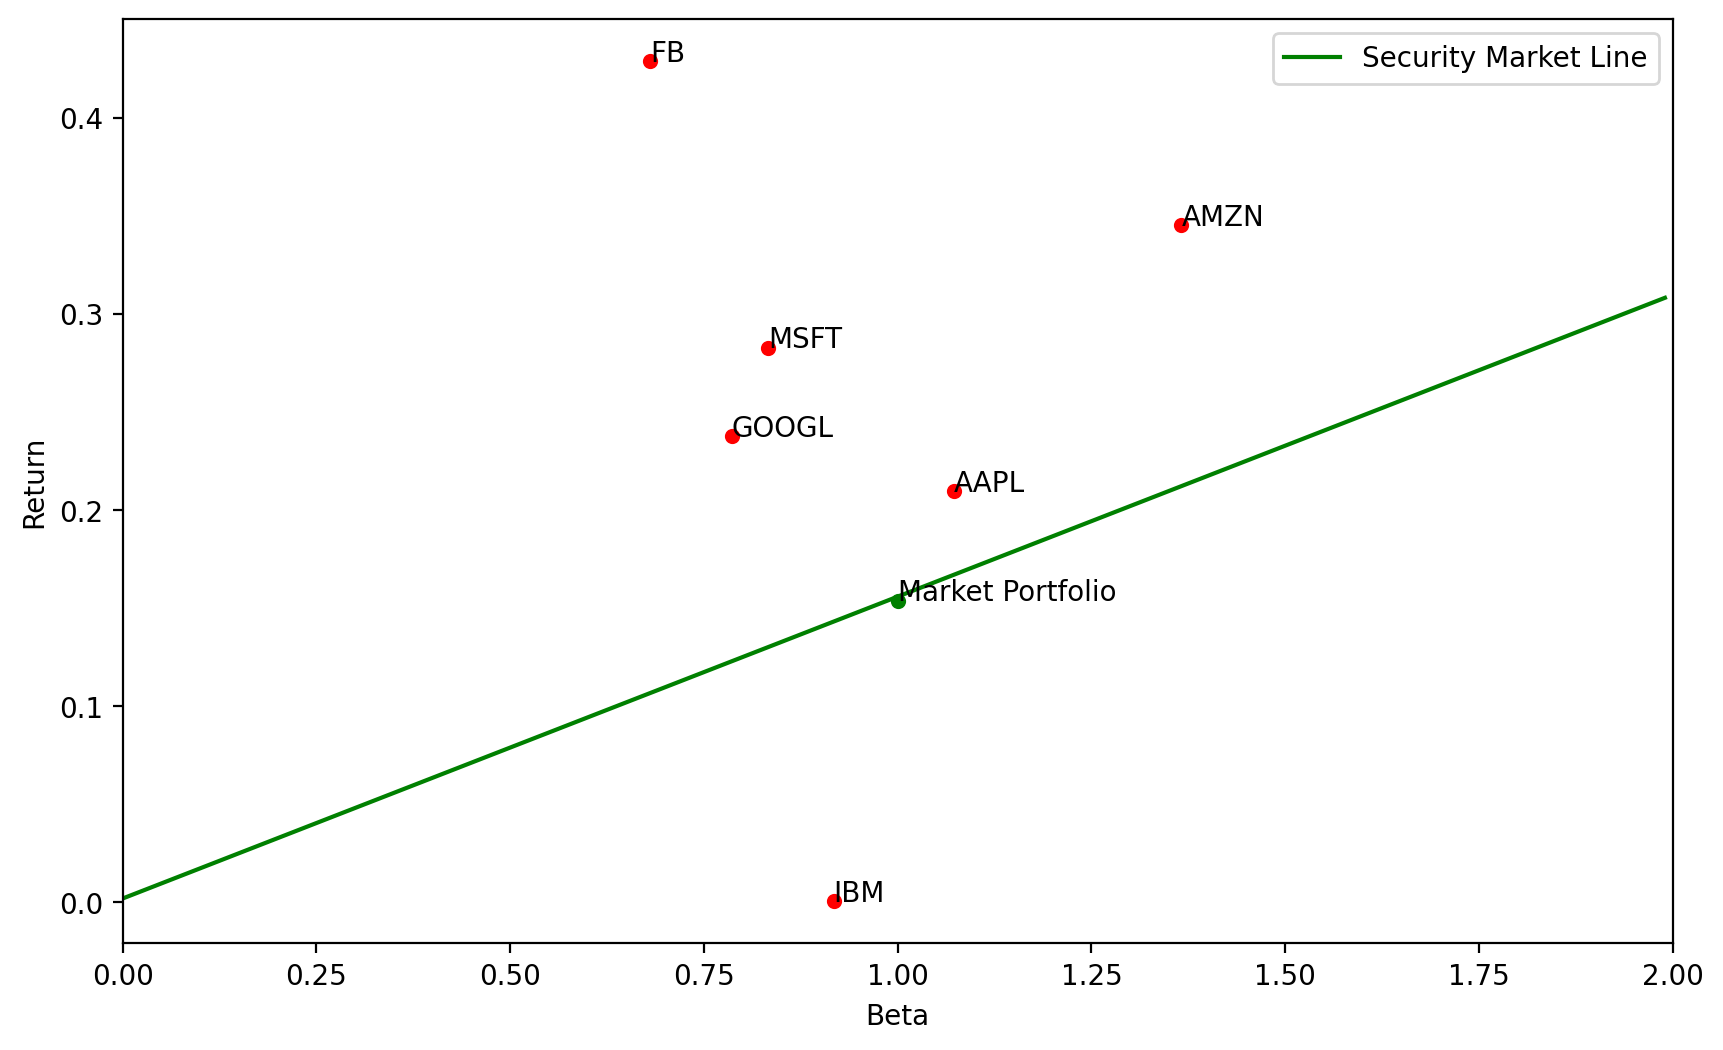

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

# Plot the Security Market Line (SML), which crosses through the following two points:
# (0, Risk-free Rate) and (1, Market Return)
xrange = np.arange(0,2,0.01)
yrange = four_factors['RF'].mean()*12+((four_factors['Mkt-RF']+four_factors['RF']).mean()*12)*xrange
ax.plot(xrange,yrange,color='green',label = 'Security Market Line')

ax.scatter(1,(four_factors['Mkt-RF']+four_factors['RF']).mean()*12,color='green',s=20)
ax.annotate('Market Portfolio',(1,(four_factors['Mkt-RF']+four_factors['RF']).mean()*12))

for ticker in results_capm.index:
    ax.scatter(results_capm.loc[ticker]['MKTRF Beta'],rets_all[rets_all['TICKER']==ticker]['RET'].mean()*12,color='red',s=20)
    ax.annotate(ticker,(results_capm.loc[ticker]['MKTRF Beta'],rets_all[rets_all['TICKER']==ticker]['RET'].mean()*12))

ax.set_xlim(0,2)
    
ax.set_xlabel("Beta")
ax.set_ylabel("Return")

ax.legend();

### 2. Fama-French 4-Factor Model

We will use the following time series regression model:

$r_{it} = \alpha_i + \beta_{MKT} r_{mt} + \beta_{SMB} SMB_t + \beta_{HML} HML_{t} + \beta_{MOM} MOM_{t} + \epsilon_{it}$

where $r_i$ is the excess return (risk premium) of asset $i$, $r_m$ is the excess return on the market (market risk premium), $SMB$ is the size factor return, $HML$ is the value factor return, and $MOM$ is the momentum factor return.

#### Running FF 4-factor model for one stock

In [17]:
Y = data1['RET']-data1['RF']
X = sm.add_constant(data1[['Mkt-RF','SMB','HML', 'MOM']])
reg = sm.OLS(Y,X, missing = 'drop').fit()

print(reg.summary(yname = 'AMZN' + ' Return', 
                  xname = ['Alpha', 'MKTRF Beta', 'SMB Beta', 'HML Beta', 'MOM Beta']))

                            OLS Regression Results                            
Dep. Variable:            AMZN Return   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     9.768
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.83e-06
Time:                        16:22:38   Log-Likelihood:                 85.571
No. Observations:                  60   AIC:                            -161.1
Df Residuals:                      55   BIC:                            -150.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha          0.0077      0.009      0.875      0.3

In [18]:
# Running FF 4-factor model for all stocks, and storing the parameters in results_ff4
results_ff4 = pd.DataFrame()

for ticker in rets_all['TICKER'].unique():
    stock = rets_all[rets_all['TICKER']==ticker].copy()
    stock.index = stock.index + pd.offsets.MonthEnd(0)
    
    data = pd.merge(stock, four_factors, on='Date')

    Y = data['RET']-data['RF']
    X = sm.add_constant(data[['Mkt-RF','SMB','HML', 'MOM']])
    reg = sm.OLS(Y,X, missing = 'drop').fit()

    results_ff4 = pd.concat([results_ff4, 
                            pd.DataFrame({'TICKER':[ticker], 
                                          'Alpha':[reg.params[0]],
                                          'Alpha p-value':[reg.pvalues[0]],
                                          'MKTRF Beta':[reg.params[1]],
                                          'MKTRF Beta p-value':[reg.pvalues[1]], 
                                          'SMB Beta':[reg.params[2]],
                                          'SMB Beta p-value':[reg.pvalues[2]],
                                          'HML Beta':[reg.params[3]],
                                          'HML Beta p-value':[reg.pvalues[3]],
                                          'MOM Beta':[reg.params[4]],
                                          'MOM Beta p-value':[reg.pvalues[4]],
                                         'Adj R2':[reg.rsquared_adj]})],
                                           axis = 0)
results_ff4.set_index('TICKER', inplace = True)

In [19]:
results_ff4.round(2)

,Alpha,Alpha p-value,MKTRF Beta,MKTRF Beta p-value,SMB Beta,SMB Beta p-value,HML Beta,HML Beta p-value,MOM Beta,MOM Beta p-value,Adj R2
TICKER,,,,,,,,,,,
MSFT,0.01,0.14,0.99,0.00,-1.10,0.00,-0.05,0.89,-0.32,0.23,0.29
IBM,-0.01,0.07,0.92,0.00,-0.31,0.22,0.29,0.32,-0.21,0.35,0.28
FB,0.02,0.07,0.86,0.05,-0.16,0.75,-0.88,0.13,0.43,0.34,0.09
AAPL,0.00,0.78,1.18,0.00,-0.66,0.06,-0.88,0.03,-0.26,0.39,0.28
AMZN,0.01,0.39,1.58,0.00,-0.51,0.15,-0.95,0.02,0.25,0.42,0.37
GOOGL,0.01,0.46,1.06,0.00,-0.63,0.02,-0.43,0.17,0.46,0.06,0.33


### 3. Portfolio Performance Analysis

In [20]:
# Compute the market value of equity (MVEQ) for each stock at the end of December 2012
weights = pd.read_csv('december_2012.csv',
                     usecols=['date','TICKER','PRC','SHROUT'],
                     index_col = 'date',
                     parse_dates=True)

weights['MVEQ'] = weights['PRC']*weights['SHROUT']/1_000_000

weights.drop(['PRC','SHROUT'],axis=1,inplace=True)

In [21]:
weights.head()

,TICKER,MVEQ
date,,
2012-12-31,MSFT,223.667028
2012-12-31,IBM,216.438475
2012-12-31,FB,44.481519
2012-12-31,AAPL,499.695994
2012-12-31,AMZN,113.894980


In [22]:
# Create value-weights based on each stocks' market value of equity on 12/31/2012
weights['VW']=weights['MVEQ']/weights['MVEQ'].sum()

# Create equal weights based on the number of stocks
weights['EW']=1/len(weights['TICKER'].unique())

weights.drop('MVEQ',axis=1,inplace=True)

In [23]:
weights

,TICKER,VW,EW
date,,,
2012-12-31,MSFT,0.173740,0.166667
2012-12-31,IBM,0.168125,0.166667
2012-12-31,FB,0.034552,0.166667
2012-12-31,AAPL,0.388154,0.166667
2012-12-31,AMZN,0.088471,0.166667
2012-12-31,GOOG,0.146957,0.166667


In [24]:
weights=weights.reset_index().set_index('TICKER')
weights.drop('date',axis=1,inplace=True)
weights

,VW,EW
TICKER,,
MSFT,0.173740,0.166667
IBM,0.168125,0.166667
FB,0.034552,0.166667
AAPL,0.388154,0.166667
AMZN,0.088471,0.166667
GOOG,0.146957,0.166667


In [25]:
#Create a returns DataFrame to store the monthly returns for all the stocks in the sample
returns = pd.DataFrame()
for ticker in rets_all['TICKER'].unique():
    returns[ticker]=rets_all[rets_all['TICKER']==ticker]['RET']
returns.head()

,MSFT,IBM,FB,AAPL,AMZN,GOOGL
Date,,,,,,
2013-01-31,0.027717,0.060141,0.163837,-0.144094,0.058317,0.068294
2013-02-28,0.021129,-0.006845,-0.120429,-0.025116,-0.004633,0.060223
2013-03-28,0.028957,0.062092,-0.061284,0.002855,0.008401,-0.008752
2013-04-30,0.157140,-0.050445,0.085575,0.000271,-0.047581,0.038255
2013-05-31,0.061329,0.031747,-0.123195,0.022596,0.060636,0.056573


In [26]:
# Compute the returns of monthly-rebalanced value-weighted (VW) and equal-weighted (EW) portfolios
port_returns = pd.DataFrame(index=returns.index)
port_returns['VW_Port']=np.dot(returns,weights['VW'])
port_returns['EW_Port']=np.dot(returns,weights['EW'])
port_returns.head()

,VW_Port,EW_Port
Date,,
2013-01-31,-0.020147,0.039035
2013-02-28,-0.002950,-0.012612
2013-03-28,0.013918,0.005378
2013-04-30,0.023295,0.030536
2013-05-31,0.034185,0.018281


In [27]:
# Merging the FF factors into the portfolio returns DataFrame
port_returns.index = port_returns.index + pd.offsets.MonthEnd(0)

data = pd.merge(port_returns, four_factors, left_index=True, right_index=True)

data.head()

,VW_Port,EW_Port,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,,,
2013-01-31,-0.020147,0.039035,0.0557,0.0033,0.0096,0.0,-0.0179
2013-02-28,-0.002950,-0.012612,0.0129,-0.0028,0.0011,0.0,0.0129
2013-03-31,0.013918,0.005378,0.0403,0.0081,-0.0019,0.0,0.0192
2013-04-30,0.023295,0.030536,0.0155,-0.0236,0.0045,0.0,0.0022
2013-05-31,0.034185,0.018281,0.0280,0.0173,0.0263,0.0,-0.0202


In [28]:
# Running FF 4-factor model for both portfolios, and storing the parameters in results_ff4
results_ff4 = pd.DataFrame({'Portfolio':[],
                             'Alpha':[],
                             'Alpha p-value':[],
                             'MKTRF Beta':[], 
                             'MKTRF Beta p-value':[], 
                             'SMB Beta':[], 
                             'SMB Beta p-value':[],
                             'HML Beta':[], 
                             'HML Beta p-value':[], 
                             'MOM Beta':[],
                             'MOM Beta p-value':[],
                             'Adj R2':[]})
for column in port_returns.columns[:2]:
    Y = data[column]-data['RF']
    X = sm.add_constant(data[['Mkt-RF','SMB','HML', 'MOM']])
    reg = sm.OLS(Y,X, missing = 'drop').fit()
    print(reg.summary(yname = column + ' Return'))
    results_ff4 = pd.concat([results_ff4, 
                            pd.DataFrame({'Portfolio':[column], 
                                          'Alpha':[reg.params[0]],
                                          'Alpha p-value':[reg.pvalues[0]],
                                          'MKTRF Beta':[reg.params[1]],
                                          'MKTRF Beta p-value':[reg.pvalues[1]], 
                                          'SMB Beta':[reg.params[2]],
                                          'SMB Beta p-value':[reg.pvalues[2]],
                                          'HML Beta':[reg.params[3]],
                                          'HML Beta p-value':[reg.pvalues[3]],
                                          'MOM Beta':[reg.params[4]],
                                          'MOM Beta p-value':[reg.pvalues[4]],
                                         'Adj R2':[reg.rsquared_adj]})],
                                           axis = 0)
results_ff4.set_index('Portfolio', inplace = True)

                            OLS Regression Results                            
Dep. Variable:         VW_Port Return   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     22.12
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           6.34e-11
Time:                        16:22:59   Log-Likelihood:                 133.00
No. Observations:                  60   AIC:                            -256.0
Df Residuals:                      55   BIC:                            -245.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.004      0.800      0.4

In [29]:
results_ff4.round(4)

,Alpha,Alpha p-value,MKTRF Beta,MKTRF Beta p-value,SMB Beta,SMB Beta p-value,HML Beta,HML Beta p-value,MOM Beta,MOM Beta p-value,Adj R2
Portfolio,,,,,,,,,,,
VW_Port,0.0032,0.4271,1.1108,0.0,-0.6416,0.0002,-0.4802,0.0109,-0.0874,0.5386,0.5888
EW_Port,0.0064,0.0779,1.0995,0.0,-0.5617,0.0002,-0.4837,0.0044,0.0601,0.6359,0.6329


In [30]:
results_ff4.T.round(4)

Portfolio,VW_Port,EW_Port
Alpha,0.0032,0.0064
Alpha p-value,0.4271,0.0779
MKTRF Beta,1.1108,1.0995
MKTRF Beta p-value,0.0000,0.0000
SMB Beta,-0.6416,-0.5617
SMB Beta p-value,0.0002,0.0002
HML Beta,-0.4802,-0.4837
HML Beta p-value,0.0109,0.0044
MOM Beta,-0.0874,0.0601
MOM Beta p-value,0.5386,0.6359
